## The System:

![grafik.png][def]


[def]: .\PTG_System.png

## Preperation

In [2]:
#!pip install gurobipy==10.0.0
#!pip install pyomo==6.6.2
#!pip install numpy==1.24.3
#!pip install pandas==1.3.5
#!pip install matplotlib

In [3]:
from gurobipy import *
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsam.timeseriesaggregation as tsam


## Time Agreegation

load time series data


In [4]:
# Time series data of a whole year with hourly resolution
time_series_data = pd.read_excel(".\Data_Sheet_neu_2.xlsx")


print(time_series_data)

      Unnamed: 0  s     t  dt  PowerD_demand  HeatD_demand   P_PV_tot  \
0              0  1     1   1         134.16     88.455029    0.00000   
1              1  1     2   1         131.28     91.817355    0.00000   
2              2  1     3   1         130.56     92.851917    0.00000   
3              3  1     4   1         133.20     87.161827    0.00000   
4              4  1     5   1         133.20     96.214243    0.00000   
...          ... ..   ...  ..            ...           ...        ...   
8755        8755  1  8756   1         127.68    113.801792  114.32600   
8756        8756  1  8757   1         130.56    102.680253  124.98200   
8757        8757  1  8758   1         127.92    102.680253   72.58320   
8758        8758  1  8759   1         128.16     90.006872   53.43440   
8759        8759  1  8760   1         131.52     96.990164   10.01728   

      electricity_price  
0             -0.013287  
1             -0.002750  
2             -0.003778  
3             -0.01

In [5]:
# Spaltennamen der 2., 3. und 4. Spalte ermitteln
columns_to_drop = time_series_data.columns[[0, 1, 2,3]]

# Neue Variable mit den herausgefilterten Spalten
modified_time_series_data = time_series_data.drop(columns=columns_to_drop)

print(modified_time_series_data)

      PowerD_demand  HeatD_demand   P_PV_tot  electricity_price
0            134.16     88.455029    0.00000          -0.013287
1            131.28     91.817355    0.00000          -0.002750
2            130.56     92.851917    0.00000          -0.003778
3            133.20     87.161827    0.00000          -0.013056
4            133.20     96.214243    0.00000          -0.011539
...             ...           ...        ...                ...
8755         127.68    113.801792  114.32600           0.023130
8756         130.56    102.680253  124.98200           0.020431
8757         127.92    102.680253   72.58320           0.015420
8758         128.16     90.006872   53.43440           0.027447
8759         131.52     96.990164   10.01728           0.006271

[8760 rows x 4 columns]


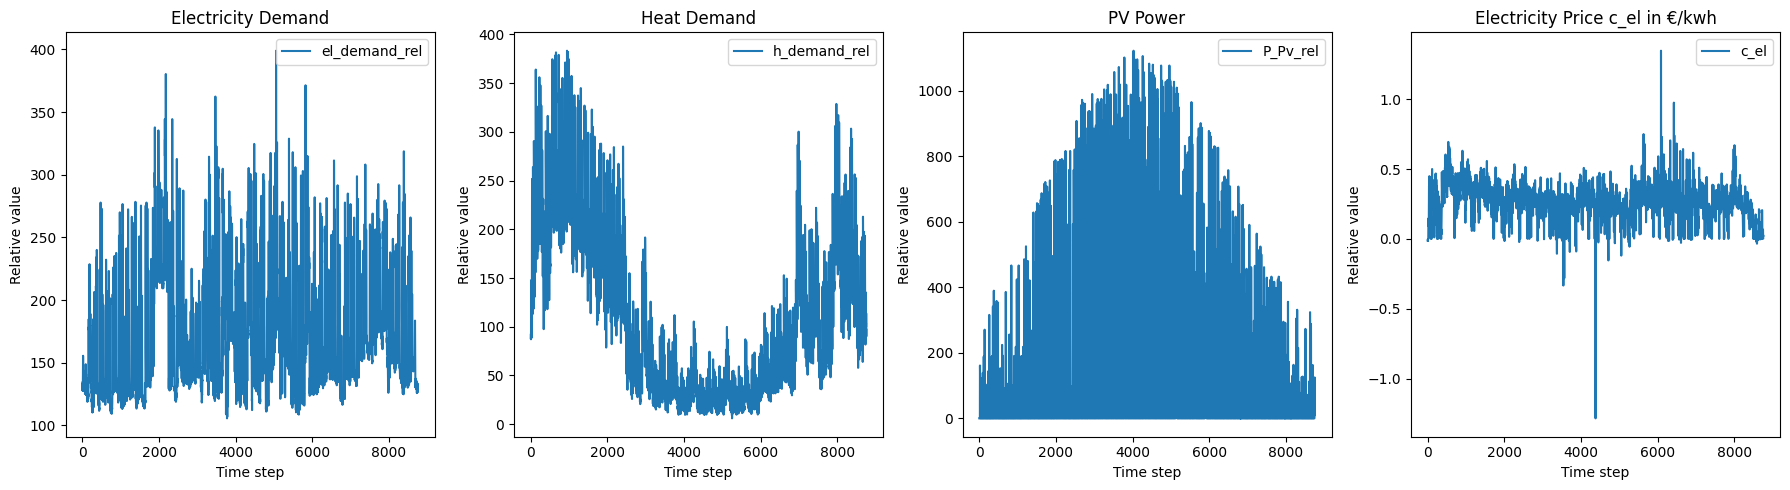

In [6]:
# Erstelle eine Figur mit 3 nebeneinanderliegenden Subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot für den ersten Datensatz
axes[0].plot(modified_time_series_data['PowerD_demand'], label='el_demand_rel')
axes[0].set_xlabel('Time step')
axes[0].set_ylabel('Relative value')
axes[0].legend()
axes[0].set_title('Electricity Demand')

# Plot für den zweiten Datensatz
axes[1].plot(modified_time_series_data['HeatD_demand'], label='h_demand_rel')
axes[1].set_xlabel('Time step')
axes[1].set_ylabel('Relative value')
axes[1].legend()
axes[1].set_title('Heat Demand')

# Plot für den dritten Datensatz
axes[2].plot(modified_time_series_data['P_PV_tot'], label='P_Pv_rel')
axes[2].set_xlabel('Time step')
axes[2].set_ylabel('Relative value')
axes[2].legend()
axes[2].set_title('PV Power')

# Plot für den dritten Datensatz
axes[3].plot(modified_time_series_data['electricity_price'], label='c_el')
axes[3].set_xlabel('Time step')
axes[3].set_ylabel('Relative value')
axes[3].legend()
axes[3].set_title('Electricity Price c_el in €/kwh')

# Layout anpassen
plt.tight_layout()

# Zeige die Plots
plt.show()

Time series aggregation


In [7]:
# aggregate time_series_data with the tsam package
noTypicalPeriods = 19
hoursPerPeriod = 24

aggregation = tsam.TimeSeriesAggregation(
        timeSeries                  = modified_time_series_data,
        noTypicalPeriods            = noTypicalPeriods,
        hoursPerPeriod              = hoursPerPeriod,
        clusterMethod               = 'hierarchical',
        resolution                  = 1
    )
typical_day_time_series_data = aggregation.createTypicalPeriods()

print(typical_day_time_series_data)

             HeatD_demand    P_PV_tot  PowerD_demand  electricity_price
   TimeStep                                                            
0  0           115.867784  147.855538     137.232837           0.286946
   1           117.475427   15.088817     139.130807           0.262045
   2           127.925106    0.000000     140.396121           0.252344
   3           127.925106    0.000000     141.028777           0.242669
   4           146.011088    0.000000     144.824718           0.237755
...                   ...         ...            ...                ...
18 19           20.811811  969.097988     234.661975           0.337129
   20           20.557894  954.696519     242.253856           0.331757
   21           21.954442  899.000276     245.417139           0.320783
   22           19.986578  791.015016     242.886512           0.299498
   23           19.097865  587.094581     213.784302           0.286818

[456 rows x 4 columns]


C:\Users\Raphael\anaconda3\Lib\site-packages\tsam\timeseriesaggregation.py:873: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  typicalPeriods[column].clip(lower=0, upper=scale_ub, inplace=True)
C:\Users\Raphael\anaconda3\Lib\site-packages\tsam\timeseriesaggregation.py:875: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [8]:
# Assign labels to each original period            #NEW
typical_days_row = aggregation.clusterOrder
print("Cluster Labels:")
print(typical_days_row)
print(len(typical_days_row))

Cluster Labels:
[ 4  4  4  4 12 12  1  1  1 12 12  1  1 16 16  1 12 13  1  1  1  1  1 12
 12  1  1  1  1  1 12 12  1  1  1  1  1 12 12  1  1  1  1  1 12 12  1  1
  1  1  1 12 12  1  1  1  1  1 13 12  1  0  0  0  0 13 13 13  0  0  0  0
 13 13  0  0  0  0  2  2  2 10 10  2 10 10  0  0 10 10 10 10 10  0  4  2
  0  0  0 16  4 13  0  0 15  6  6 14 11  6  6  6  6 11 11 11  7  7  6  7
  5 11 11 14  0 14  6  6 11 11  6  6  6  8 17 17 11  8  8 17  6  6 11 11
  3  6 18  3  6 11 11  6  8  3  7 17 11 11  8  8  3 17  3  5  7  7  6 18
 11 18 11 11 18 18  8  7 11 11 11  8  8  3  3  8  7 17  8 18 18 18 18 11
  5 18  8  3  3 18 11 11  6 11 18 18 18  5 11  6  8  8  8  8 17 17  6  6
 17  3  5  5 11  6  7  6  6  6  7 11  6  6  8  8  5  5  5  5  7  6  3  5
 11 11  3  3  3  3  3  5  5  6  6  6  6  6 11 11  7  7 15  6  6  5  5 15
 15 15  6 15  7  7 15 15 15  3 15 14  5 15 15 15  5  7  5  5  7 15 15 15
  9  4 13  1  1 16 16  9  4  4  9  9 14 15 14 14 14  9  9  9  9 14  4  4
  9  9  9  9  9 14 14  9  9  9  9  

In [9]:
# print the number of days represented by each typical day
for typical_day in np.arange(noTypicalPeriods):
    print(f"Typical day {typical_day} represents {aggregation.clusterPeriodNoOccur[typical_day]} days in the original time series")
    

Typical day 0 represents 21 days in the original time series
Typical day 1 represents 44 days in the original time series
Typical day 2 represents 17 days in the original time series
Typical day 3 represents 17 days in the original time series
Typical day 4 represents 22 days in the original time series
Typical day 5 represents 19 days in the original time series
Typical day 6 represents 37 days in the original time series
Typical day 7 represents 17 days in the original time series
Typical day 8 represents 18 days in the original time series
Typical day 9 represents 20 days in the original time series
Typical day 10 represents 9 days in the original time series
Typical day 11 represents 32 days in the original time series
Typical day 12 represents 18 days in the original time series
Typical day 13 represents 9 days in the original time series
Typical day 14 represents 13 days in the original time series
Typical day 15 represents 17 days in the original time series
Typical day 16 repre

Für Seasonal_Storrage Zeitreihen erstellen

In [10]:
days_yeahr=[i for i in range(0, 365)]  #NEW
print(days_yeahr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [11]:
typical_days_dict = dict(zip(days_yeahr, typical_days_row))   #NEW
print(typical_days_dict)

{0: 4, 1: 4, 2: 4, 3: 4, 4: 12, 5: 12, 6: 1, 7: 1, 8: 1, 9: 12, 10: 12, 11: 1, 12: 1, 13: 16, 14: 16, 15: 1, 16: 12, 17: 13, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 12, 24: 12, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 12, 31: 12, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 12, 38: 12, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 12, 45: 12, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 12, 52: 12, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 13, 59: 12, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 13, 66: 13, 67: 13, 68: 0, 69: 0, 70: 0, 71: 0, 72: 13, 73: 13, 74: 0, 75: 0, 76: 0, 77: 0, 78: 2, 79: 2, 80: 2, 81: 10, 82: 10, 83: 2, 84: 10, 85: 10, 86: 0, 87: 0, 88: 10, 89: 10, 90: 10, 91: 10, 92: 10, 93: 0, 94: 4, 95: 2, 96: 0, 97: 0, 98: 0, 99: 16, 100: 4, 101: 13, 102: 0, 103: 0, 104: 15, 105: 6, 106: 6, 107: 14, 108: 11, 109: 6, 110: 6, 111: 6, 112: 6, 113: 11, 114: 11, 115: 11, 116: 7, 117: 7, 118: 6, 119: 7, 120: 5, 121: 11, 122: 11, 123: 14, 124: 0, 125: 14, 126: 6, 127: 6, 128: 11, 129: 11, 130: 6, 131: 6, 132: 

In [12]:
typical_hours_row =[] #

    
for i in range(0, 365):  #NEW
    #print(i)
    for j in range(24):
        typical_hours_row.append(typical_days_dict[i]*24+j)
        
print(len(typical_hours_row))
print(typical_hours_row)

8760
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 28

In [13]:
# Erstellen der Zahlenreihe von 0 bis 8759
zahlenreihe = list(range(0, 8760))

In [14]:
hours_to_typical_days= dict(zip(zahlenreihe,typical_hours_row))  #NEW
print(hours_to_typical_days)

{0: 96, 1: 97, 2: 98, 3: 99, 4: 100, 5: 101, 6: 102, 7: 103, 8: 104, 9: 105, 10: 106, 11: 107, 12: 108, 13: 109, 14: 110, 15: 111, 16: 112, 17: 113, 18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 96, 25: 97, 26: 98, 27: 99, 28: 100, 29: 101, 30: 102, 31: 103, 32: 104, 33: 105, 34: 106, 35: 107, 36: 108, 37: 109, 38: 110, 39: 111, 40: 112, 41: 113, 42: 114, 43: 115, 44: 116, 45: 117, 46: 118, 47: 119, 48: 96, 49: 97, 50: 98, 51: 99, 52: 100, 53: 101, 54: 102, 55: 103, 56: 104, 57: 105, 58: 106, 59: 107, 60: 108, 61: 109, 62: 110, 63: 111, 64: 112, 65: 113, 66: 114, 67: 115, 68: 116, 69: 117, 70: 118, 71: 119, 72: 96, 73: 97, 74: 98, 75: 99, 76: 100, 77: 101, 78: 102, 79: 103, 80: 104, 81: 105, 82: 106, 83: 107, 84: 108, 85: 109, 86: 110, 87: 111, 88: 112, 89: 113, 90: 114, 91: 115, 92: 116, 93: 117, 94: 118, 95: 119, 96: 288, 97: 289, 98: 290, 99: 291, 100: 292, 101: 293, 102: 294, 103: 295, 104: 296, 105: 297, 106: 298, 107: 299, 108: 300, 109: 301, 110: 302, 111: 303, 112: 

In [15]:
# reindex time series to have unique single-dimensional index starting from 0
typical_day_time_series_data = typical_day_time_series_data.reset_index()
typical_day_time_series_data = typical_day_time_series_data.rename(columns={'level_0': 'typical_day'})
typical_day_time_series_data.index = np.arange(0, noTypicalPeriods * hoursPerPeriod)
#TimeStep von 1 bis 95 laufen lassen:
typical_day_time_series_data['TimeStep'] = np.arange(0, noTypicalPeriods * hoursPerPeriod)
print(typical_day_time_series_data)

     typical_day  TimeStep  HeatD_demand    P_PV_tot  PowerD_demand  \
0              0         0    115.867784  147.855538     137.232837   
1              0         1    117.475427   15.088817     139.130807   
2              0         2    127.925106    0.000000     140.396121   
3              0         3    127.925106    0.000000     141.028777   
4              0         4    146.011088    0.000000     144.824718   
..           ...       ...           ...         ...            ...   
451           18       451     20.811811  969.097988     234.661975   
452           18       452     20.557894  954.696519     242.253856   
453           18       453     21.954442  899.000276     245.417139   
454           18       454     19.986578  791.015016     242.886512   
455           18       455     19.097865  587.094581     213.784302   

     electricity_price  
0             0.286946  
1             0.262045  
2             0.252344  
3             0.242669  
4             0.237755

In [16]:
#modified_time_series_data.to_excel('modified_time_series_data_new.xlsx', index=False)


## Time series
#### Daten laden

In [17]:
print(modified_time_series_data)

      HeatD_demand   P_PV_tot  PowerD_demand  electricity_price
0        88.455029    0.00000         134.16          -0.013287
1        91.817355    0.00000         131.28          -0.002750
2        92.851917    0.00000         130.56          -0.003778
3        87.161827    0.00000         133.20          -0.013056
4        96.214243    0.00000         133.20          -0.011539
...            ...        ...            ...                ...
8755    113.801792  114.32600         127.68           0.023130
8756    102.680253  124.98200         130.56           0.020431
8757    102.680253   72.58320         127.92           0.015420
8758     90.006872   53.43440         128.16           0.027447
8759     96.990164   10.01728         131.52           0.006271

[8760 rows x 4 columns]


In [18]:
print(typical_day_time_series_data)

     typical_day  TimeStep  HeatD_demand    P_PV_tot  PowerD_demand  \
0              0         0    115.867784  147.855538     137.232837   
1              0         1    117.475427   15.088817     139.130807   
2              0         2    127.925106    0.000000     140.396121   
3              0         3    127.925106    0.000000     141.028777   
4              0         4    146.011088    0.000000     144.824718   
..           ...       ...           ...         ...            ...   
451           18       451     20.811811  969.097988     234.661975   
452           18       452     20.557894  954.696519     242.253856   
453           18       453     21.954442  899.000276     245.417139   
454           18       454     19.986578  791.015016     242.886512   
455           18       455     19.097865  587.094581     213.784302   

     electricity_price  
0             0.286946  
1             0.262045  
2             0.252344  
3             0.242669  
4             0.237755

In [19]:
time_slices = np.array(typical_day_time_series_data.index)

shifted_time_slices = [] # time slice number shifted by 1 to create the storage level constraint
time_slice_weight = []

for typical_period in np.arange(noTypicalPeriods):
    time_slices_within_typical_period = typical_day_time_series_data[typical_day_time_series_data.typical_day == typical_period].index
    shifted_time_slices_within_period = np.roll(time_slices_within_typical_period,-1)
    shifted_time_slices.extend(shifted_time_slices_within_period) 
    time_slice_weight.extend(aggregation.clusterPeriodNoOccur[typical_period]*np.ones(len(time_slices_within_typical_period)))
    
print(shifted_time_slices)
print(time_slice_weight)

# weight of each time slice [h]
time_slice_weight = dict(zip(time_slices, time_slice_weight))

# consecutive time slice of each time slice
next_time_slice = dict(zip(time_slices, shifted_time_slices))



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 72, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 120, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 144, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 168, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 192, 217, 218, 219, 220, 221, 222,

In [20]:
print (time_slice_weight)

{0: 21.0, 1: 21.0, 2: 21.0, 3: 21.0, 4: 21.0, 5: 21.0, 6: 21.0, 7: 21.0, 8: 21.0, 9: 21.0, 10: 21.0, 11: 21.0, 12: 21.0, 13: 21.0, 14: 21.0, 15: 21.0, 16: 21.0, 17: 21.0, 18: 21.0, 19: 21.0, 20: 21.0, 21: 21.0, 22: 21.0, 23: 21.0, 24: 44.0, 25: 44.0, 26: 44.0, 27: 44.0, 28: 44.0, 29: 44.0, 30: 44.0, 31: 44.0, 32: 44.0, 33: 44.0, 34: 44.0, 35: 44.0, 36: 44.0, 37: 44.0, 38: 44.0, 39: 44.0, 40: 44.0, 41: 44.0, 42: 44.0, 43: 44.0, 44: 44.0, 45: 44.0, 46: 44.0, 47: 44.0, 48: 17.0, 49: 17.0, 50: 17.0, 51: 17.0, 52: 17.0, 53: 17.0, 54: 17.0, 55: 17.0, 56: 17.0, 57: 17.0, 58: 17.0, 59: 17.0, 60: 17.0, 61: 17.0, 62: 17.0, 63: 17.0, 64: 17.0, 65: 17.0, 66: 17.0, 67: 17.0, 68: 17.0, 69: 17.0, 70: 17.0, 71: 17.0, 72: 17.0, 73: 17.0, 74: 17.0, 75: 17.0, 76: 17.0, 77: 17.0, 78: 17.0, 79: 17.0, 80: 17.0, 81: 17.0, 82: 17.0, 83: 17.0, 84: 17.0, 85: 17.0, 86: 17.0, 87: 17.0, 88: 17.0, 89: 17.0, 90: 17.0, 91: 17.0, 92: 17.0, 93: 17.0, 94: 17.0, 95: 17.0, 96: 22.0, 97: 22.0, 98: 22.0, 99: 22.0, 100: 22.0

In [21]:
# Erstellen des Dictionaries
storage_next_time_slices = {zahlenreihe[i]: zahlenreihe[(i + 1) % len(zahlenreihe)] for i in range(len(zahlenreihe))}

# Ausgabe des Ergebnisses
print(storage_next_time_slices)
print(storage_next_time_slices[8758])

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [22]:
print(time_slices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [23]:
 # gas price of each time slice
power_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['PowerD_demand'])))

# # heat demand of each time slice
heat_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['HeatD_demand'])))

# # electricity_price of each time slice
electricity_price_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['electricity_price'])))

# # PV_Power of eacj time slice
power_PV_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['P_PV_tot'])))
for timeslice in power_PV_time_series:
        if power_PV_time_series[timeslice] > 900:
            power_PV_time_series[timeslice] = 900


## Setting up the model:

In [24]:
model = ConcreteModel()


# declare sets
model.time_slices = set(time_slices)
model.time_slices_through_whole_yeahr = set(zahlenreihe)

In [25]:
print(model.time_slices)
print(model.time_slices_through_whole_yeahr)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [26]:
print(len(zahlenreihe))
print(len(time_slices))

8760
456


In [27]:
# declare decision variables
model.OPEX = Var(domain=NonNegativeReals) # [€]

# declare time dependent decision variables
model.P_e_buy = Var(model.time_slices, domain=NonNegativeReals) # Power, that needs to get bought from the grid [kW_e]
model.P_CH4_sell = Var(model.time_slices, domain=NonNegativeReals) # CH4, that gets to sell to the grid [kW_CH4]
model.mdot_CO2_atm = Var(model.time_slices, domain=NonNegativeReals) # CO2 emissions [kg_CO2/hr]

# Component_Inputs
model.P_e_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_e]
model.P_e_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kW_e]
model.P_H2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_H2]
model.mdot_CO2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CO2] STIMMT EINHEIT???
model.P_CH4_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_CH4]
model.P_CH4_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_CH4]

model.y_PEM = Var(model.time_slices, domain=Binary) # Electrolysis, on/off
model.y_CHP = Var(model.time_slices, domain=Binary) # CombinedHeatPower, on/off
model.y_BO = Var(model.time_slices, domain=Binary) # Boiler, on/off

# Component_Outputs
model.P_e_PV = Var(model.time_slices, domain=NonNegativeReals) # PV [kW_e]
model.P_H2_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_H2]
model.mdot_CO2_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kg_CO2/hr]
model.P_CH4_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CH4]
model.P_e_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_e]
model.P_h_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_h]
model.P_h_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_h]                      

# Storages
model.P_e_battery = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_e]  #hier ist die Frage_model.time_slices oder model.time_slices_through_whole_yeahr
model.P_e_battery_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_e] 
model.P_e_battery_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) #  [kW_e]
model.storage_level_battery = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_battery =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_battery = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_e_battery_yearly = Var(model.time_slices_through_whole_yeahr, domain=Reals) # [kW_e]

model.P_h_thermalStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_h]
model.P_h_thermalStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.P_h_thermalStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.storage_level_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_thermalStorage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_h_thermalStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_h]

model.P_H2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_H2]
model.P_H2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.P_H2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.storage_level_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_H2]
model.in_H2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_H2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_H2]

model.mdot_CO2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kg_CO2/hr]
model.mdot_CO2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.mdot_CO2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.storage_level_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2]
model.in_CO2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.mdot_CO2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kg_CO2/hr]

model.P_CH4_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_CH4]
model.P_CH4_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.P_CH4_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.storage_level_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_CH4]
model.in_CH4Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_CH4_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_CH4]

In [28]:
# declare parameters

model.price_co2 = 0.0844 # [€/ton]
model.price_gas = 0.0775 # [€/kWh]

model.co2_ch4_relation = 2.744 #[kg_CO2/kg_CH4]

model.P_e_min_PEM = 180 #[kW_e]
model.P_e_max_PEM = 1080 #[kW_e]

model.mdot_CO2_N_DAC = 250 #[kg_CO2/hr]
model.eta_DAC = 0.5 #[kg_CO2/kWh_e]

model.P_CH4_N_MR = 1500 #[kW_CH4]
model.eta_MR = 0.78
model.co2need_MR = 0.178 #E_in_CO2/E_out_CH4 [kg_CO2/kWh_CH4]

model.P_h_min_CHP = 400 #[kW_h]
model.P_h_max_CHP = 800 #[kW_h]

model.P_h_min_BO = 0.5 #[kW_h]
model.P_h_max_BO = 500 #[kW_h]

model.E_N_battery = 5000 #[kWh_e]
model.eta_battery = 0.92 
model.loss_battery = 0.000042 #[1/hr]
model.c_battery = 0.36 #[1/hr]

model.Q_N_thermalStorage = 5000 #[kWh_Q]
model.eta_thermalStorage = 0.95 
model.loss_thermalStorage = 0.005 #[1/hr]
model.c_thermalStorage = 1 #[1/hr]

model.E_N_H2Storage = 5000 #[kWh_H2]
model.m_N_CO2Storage = 5000 #[kg_CO2]
model.E_N_CH4Storage = 5000 #[kWh_CH4]
model.loss_gasTanks = 0 #[1/hr]
model.eta_gasTanks = 1 
model.c_gasTanks = 0.25 #[1/hr]


In [29]:
#declare time dependent parameters
model.time_slice_weight = Param(model.time_slices, initialize = time_slice_weight)
model.P_e_demand = Param(model.time_slices, initialize = power_demand_time_series)
model.Q_demand = Param(model.time_slices, initialize = heat_demand_time_series)

model.electricity_price = Param(model.time_slices, initialize = electricity_price_time_series)

model.P_PV = Param(model.time_slices, initialize = power_PV_time_series)


In [30]:
print(time_slice_weight)
print(power_demand_time_series)

{0: 21.0, 1: 21.0, 2: 21.0, 3: 21.0, 4: 21.0, 5: 21.0, 6: 21.0, 7: 21.0, 8: 21.0, 9: 21.0, 10: 21.0, 11: 21.0, 12: 21.0, 13: 21.0, 14: 21.0, 15: 21.0, 16: 21.0, 17: 21.0, 18: 21.0, 19: 21.0, 20: 21.0, 21: 21.0, 22: 21.0, 23: 21.0, 24: 44.0, 25: 44.0, 26: 44.0, 27: 44.0, 28: 44.0, 29: 44.0, 30: 44.0, 31: 44.0, 32: 44.0, 33: 44.0, 34: 44.0, 35: 44.0, 36: 44.0, 37: 44.0, 38: 44.0, 39: 44.0, 40: 44.0, 41: 44.0, 42: 44.0, 43: 44.0, 44: 44.0, 45: 44.0, 46: 44.0, 47: 44.0, 48: 17.0, 49: 17.0, 50: 17.0, 51: 17.0, 52: 17.0, 53: 17.0, 54: 17.0, 55: 17.0, 56: 17.0, 57: 17.0, 58: 17.0, 59: 17.0, 60: 17.0, 61: 17.0, 62: 17.0, 63: 17.0, 64: 17.0, 65: 17.0, 66: 17.0, 67: 17.0, 68: 17.0, 69: 17.0, 70: 17.0, 71: 17.0, 72: 17.0, 73: 17.0, 74: 17.0, 75: 17.0, 76: 17.0, 77: 17.0, 78: 17.0, 79: 17.0, 80: 17.0, 81: 17.0, 82: 17.0, 83: 17.0, 84: 17.0, 85: 17.0, 86: 17.0, 87: 17.0, 88: 17.0, 89: 17.0, 90: 17.0, 91: 17.0, 92: 17.0, 93: 17.0, 94: 17.0, 95: 17.0, 96: 22.0, 97: 22.0, 98: 22.0, 99: 22.0, 100: 22.0

In [31]:
# declare unindexed constraints
model.OPEX_constraint = Constraint(expr =  model.OPEX == sum(model.electricity_price[time_slice] * model.P_e_buy[time_slice] * model.time_slice_weight[time_slice] for time_slice in model.time_slices) 
                                     -  sum(model.price_gas * model.P_CH4_sell[time_slice] * model.time_slice_weight[time_slice] for time_slice in model.time_slices)
                                    +  sum(model.price_co2 * model.mdot_CO2_atm[time_slice] * model.time_slice_weight[time_slice] for time_slice in model.time_slices))

# declare rules to setup indexed constraints
def electricty_balance_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] + model.P_e_CHP[time_slice] + model.P_e_battery[time_slice] + model.P_e_buy[time_slice] == model.P_e_demand[time_slice] + model.P_e_PEM[time_slice] + model.P_e_DAC[time_slice])

def heat_balance_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] + model.P_h_BO[time_slice] + model.P_h_thermalStorage[time_slice] == model.Q_demand[time_slice])

def h2_balance_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] + model.P_H2_gasStorage[time_slice] == model.P_H2_MR[time_slice])

def co2_balance_contraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] + model.mdot_CO2_gasStorage[time_slice] == model.mdot_CO2_MR[time_slice])

def ch4_balance_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] + model.P_CH4_gasStorage[time_slice] == model.P_CH4_CHP[time_slice] + model.P_CH4_BO[time_slice] + model.P_CH4_sell[time_slice])

def co2_emmission_constraint_rule(model, time_slice):
    return (model.mdot_CO2_atm[time_slice] == model.co2_ch4_relation * (model.P_CH4_BO[time_slice] + model.P_CH4_CHP[time_slice]))



def PV_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] == model.P_PV[time_slice])

def PEM_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] == 47.877 * model.y_PEM[time_slice] + 0.549 * model.P_e_PEM[time_slice])
def PEM_minInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] >= model.P_e_min_PEM * model.y_PEM[time_slice])
def PEM_maxInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] <= model.P_e_max_PEM* model.y_PEM[time_slice])

def DAC_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] == model.eta_DAC * model.P_e_DAC[time_slice])
def DAC_maxOuput_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] <= model.mdot_CO2_N_DAC)

def MR_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] == model.eta_MR * model.P_H2_MR[time_slice])
def MR_CO2_constraint_rule(model, time_slice):
    return (model.mdot_CO2_MR[time_slice] == model.co2need_MR * model.P_CH4_MR[time_slice])
def MR_maxOuput_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] <= model.P_CH4_N_MR)

def CHP_heat_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] == 0.47 * model.P_CH4_CHP[time_slice])

def CHP_heat_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] == -2416.78 * model.y_CHP[time_slice] + 1.90 * model.P_CH4_CHP[time_slice] 
def CHP_heat_minOuput_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] >= model.P_h_min_CHP * model.y_CHP[time_slice]
def CHP_heat_maxOuput_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] <= model.P_h_max_CHP * model.y_CHP[time_slice]
def CHP_electricity_constraint_rule(model, time_slice):
    return (model.P_e_CHP[time_slice] == -2042.74 * model.y_CHP[time_slice] + 1.61 * model.P_CH4_CHP[time_slice]) 
    
def BO_constraint_rule(model, time_slice):
    return (model.P_CH4_BO[time_slice]  == 113.95 * model.y_BO[time_slice] + 0.82 * model.P_h_BO[time_slice])
def BO_minOuput_constraint_rule(model, time_slice):
    return (model.P_h_BO[time_slice] >= model.P_h_min_BO * model.y_BO[time_slice])
def BO_maxOuput_constraint_rule(model, time_slice):
    return (model.P_h_BO[time_slice] <= model.P_h_max_BO * model.y_BO[time_slice])



#Battery
def battery_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return (model.storage_level_battery[storage_next_time_slices[time_slice_through_whole_yeahr]] == 
        model.storage_level_battery[time_slice_through_whole_yeahr] * (1-model.loss_battery)
        + (model.P_e_battery_in[time_slice_through_whole_yeahr]*model.eta_battery - model.P_e_battery_out[time_slice_through_whole_yeahr]/model.eta_battery))
    
def battery_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_yearly[time_slice_through_whole_yeahr] == -model.P_e_battery_in[time_slice_through_whole_yeahr] + model.P_e_battery_out[time_slice_through_whole_yeahr])
    
def battery_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_in[time_slice_through_whole_yeahr] <= model.in_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)
    
def battery_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_out[time_slice_through_whole_yeahr] <= model.out_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)

def battery_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_battery[time_slice_through_whole_yeahr] + model.out_battery[time_slice_through_whole_yeahr] <= 1)

def connect_battery_time_slices_rule(model, time_slice_through_whole_yeahr):  # NEW---??
    return  (model.P_e_battery[hours_to_typical_days[time_slice_through_whole_yeahr]] ==model.P_e_battery_yearly[time_slice_through_whole_yeahr])



#thermalStorage
def thermalStorage_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.storage_level_thermalStorage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_thermalStorage[time_slice_through_whole_yeahr] * (1-model.loss_thermalStorage)
        + (model.P_h_thermalStorage_in[time_slice_through_whole_yeahr]*model.eta_thermalStorage - model.P_h_thermalStorage_out[time_slice_through_whole_yeahr]/model.eta_thermalStorage)))

def thermalStorage_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):  
    return  (model.P_h_thermalStorage_yearly[time_slice_through_whole_yeahr] == - model.P_h_thermalStorage_in[time_slice_through_whole_yeahr] + model.P_h_thermalStorage_out[time_slice_through_whole_yeahr])  

def thermalStorage_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):        
    return  (model.P_h_thermalStorage_in[time_slice_through_whole_yeahr] <= model.in_thermalStorage[time_slice_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):    
    return  (model.P_h_thermalStorage_out[time_slice_through_whole_yeahr] <= model.out_thermalStorage[time_slice_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):    
    return  (model.in_thermalStorage[time_slice_through_whole_yeahr] + model.out_thermalStorage[time_slice_through_whole_yeahr] <= 1)

def connect_thermalStorage_time_slices_rule(model, time_slice_through_whole_yeahr):  # NEW---??
    return  (model.P_h_thermalStorage[hours_to_typical_days[time_slice_through_whole_yeahr]] == model.P_h_thermalStorage_yearly[time_slice_through_whole_yeahr])


#H2Storage
def H2Storage_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.storage_level_H2Storage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_H2Storage[time_slice_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_H2_gasStorage_in[time_slice_through_whole_yeahr]*model.eta_gasTanks - model.P_H2_gasStorage_out[time_slice_through_whole_yeahr]/model.eta_gasTanks)))   
    
def H2Storage_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_H2_gasStorage_yearly[time_slice_through_whole_yeahr] == -model.P_H2_gasStorage_in[time_slice_through_whole_yeahr] + model.P_H2_gasStorage_out[time_slice_through_whole_yeahr]) 

def H2Storage_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_H2_gasStorage_in[time_slice_through_whole_yeahr] <= model.in_H2Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_H2_gasStorage_out[time_slice_through_whole_yeahr] <= model.out_H2Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_H2Storage[time_slice_through_whole_yeahr] + model.out_H2Storage[time_slice_through_whole_yeahr] <= 1)

def connect_H2Storage_time_slices_rule(model,time_slice_through_whole_yeahr):  # NEW---??
    return  (model.P_H2_gasStorage_yearly[time_slice_through_whole_yeahr]== model.P_H2_gasStorage[hours_to_typical_days[time_slice_through_whole_yeahr]])


#CO2Storage
def CO2Storage_level_constraint_rule(model, time_slice_through_whole_yeahr):    
    return  (model.storage_level_CO2Storage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_CO2Storage[time_slice_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.mdot_CO2_gasStorage_in[time_slice_through_whole_yeahr]*model.eta_gasTanks - model.mdot_CO2_gasStorage_out[time_slice_through_whole_yeahr]/model.eta_gasTanks)))   
    
def CO2Storage_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_yearly[time_slice_through_whole_yeahr] == -model.mdot_CO2_gasStorage_in[time_slice_through_whole_yeahr] + model.mdot_CO2_gasStorage_out[time_slice_through_whole_yeahr])  

def CO2Storage_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_in[time_slice_through_whole_yeahr] <= model.in_CO2Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_out[time_slice_through_whole_yeahr] <= model.out_CO2Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_CO2Storage[time_slice_through_whole_yeahr] + model.out_CO2Storage[time_slice_through_whole_yeahr] <= 1)

def connect_CO2Storage_time_slices_rule(model,time_slice_through_whole_yeahr):  # NEW---??
    return  (model.mdot_CO2_gasStorage[hours_to_typical_days[time_slice_through_whole_yeahr]]==model.mdot_CO2_gasStorage_yearly[time_slice_through_whole_yeahr])


#CH4Storage	
def CH4Storage_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.storage_level_CH4Storage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_CH4Storage[time_slice_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_CH4_gasStorage_in[time_slice_through_whole_yeahr]*model.eta_gasTanks - model.P_CH4_gasStorage_out[time_slice_through_whole_yeahr]/model.eta_gasTanks)))

def CH4Storage_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_yearly[time_slice_through_whole_yeahr] == -model.P_CH4_gasStorage_in[time_slice_through_whole_yeahr] + model.P_CH4_gasStorage_out[time_slice_through_whole_yeahr])

def CH4Storage_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_in[time_slice_through_whole_yeahr] <= model.in_CH4Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_out[time_slice_through_whole_yeahr] <= model.out_CH4Storage[time_slice_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_CH4Storage[time_slice_through_whole_yeahr] + model.out_CH4Storage[time_slice_through_whole_yeahr] <= 1)

def connect_CH4Storage_time_slices_rule(model, time_slice_through_whole_yeahr):  # NEW---??
    return  (model.P_CH4_gasStorage[hours_to_typical_days[time_slice_through_whole_yeahr]] == model.P_CH4_gasStorage_yearly[time_slice_through_whole_yeahr])


# declare indexed constraints

model.CH4Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_constraint_rule)
model.CH4Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_Energy_balance_constraint_rule)
model.CH4Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_in_constraint_rule)
model.CH4Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_out_constraint_rule)
model.CH4Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_in_or_out_or_off_constraint_rule)
model.connect_CH4Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CH4Storage_time_slices_rule)

model.Co2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_constraint_rule)
model.Co2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_Energy_balance_constraint_rule)
model.Co2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_out_constraint_rule)
model.Co2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_in_constraint_rule)
model.Co2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_in_or_out_or_off_constraint_rule)
model.connect_CO2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CO2Storage_time_slices_rule)

model.H2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_constraint_rule)
model.H2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_Energy_balance_constraint_rule)
model.H2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_out_constraint_rule)
model.H2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_in_constraint_rule)
model.H2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_in_or_out_or_off_constraint_rule)
model.commect_H2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_H2Storage_time_slices_rule)

model.thermalStorage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_constraint_rule)
model.thermalStorage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_Energy_balance_constraint_rule)
model.thermalStorage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_out_constraint_rule)
model.thermalStorage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_in_constraint_rule)
model.thermalStorage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_in_or_out_or_off_constraint_rule)
model.connect_thermalStorage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_thermalStorage_time_slices_rule)

model.battery_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_constraint_rule)
model.battery_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_Energy_balance_constraint_rule)
model.battery_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_out_constraint_rule)
model.battery_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_in_constraint_rule)
model.battery_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_in_or_out_or_off_constraint_rule)
model.connect_battery_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_battery_time_slices_rule)



model.electricty_balance_constraint = Constraint(model.time_slices, rule=electricty_balance_constraint_rule)
model.heat_balance_constraint = Constraint(model.time_slices, rule=heat_balance_constraint_rule)
model.h2_balance_constraint = Constraint(model.time_slices, rule=h2_balance_constraint_rule)
model.co2_balance_contraint = Constraint(model.time_slices, rule=co2_balance_contraint_rule)
model.ch4_balance_constraint = Constraint(model.time_slices, rule=ch4_balance_constraint_rule)
model.co2_emission_constraint = Constraint(model.time_slices, rule=co2_emmission_constraint_rule)

model.PV_constraint = Constraint(model.time_slices, rule=PV_constraint_rule)
model.PEM_constraint = Constraint(model.time_slices, rule=PEM_constraint_rule)
model.PEM_minInput_constraint = Constraint(model.time_slices, rule=PEM_minInput_constraint_rule)
model.PEM_maxInput_constraint = Constraint(model.time_slices, rule=PEM_maxInput_constraint_rule)
model.DAC_constraint = Constraint(model.time_slices, rule=DAC_constraint_rule)
model.DAC_maxOuput_constraint = Constraint(model.time_slices, rule=DAC_maxOuput_constraint_rule)
model.MR_constraint = Constraint(model.time_slices, rule=MR_constraint_rule)
model.MR_CO2_constraint = Constraint(model.time_slices, rule=MR_CO2_constraint_rule)
model.MR_maxOuput_constraint = Constraint(model.time_slices, rule=MR_maxOuput_constraint_rule)
model.CHP_heat_constraint = Constraint(model.time_slices, rule=CHP_heat_constraint_rule)
model.CHP_heat_minOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_minOuput_constraint_rule)
model.CHP_heat_maxOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_maxOuput_constraint_rule)
model.CHP_electricity_constraint = Constraint(model.time_slices, rule=CHP_electricity_constraint_rule)
model.BO_constraint = Constraint(model.time_slices, rule=BO_constraint_rule)
model.BO_minOuput_constraint = Constraint(model.time_slices, rule=BO_minOuput_constraint_rule)
model.BO_maxOuput_constraint = Constraint(model.time_slices, rule=BO_maxOuput_constraint_rule)


## Solving the problem

In [32]:
# declare objective
model.total_costs = Objective(expr = model.OPEX,
    sense = minimize)

In [33]:
# Solver
solver = SolverFactory('gurobi')
solver.options['TimeLimit'] = 400  # Zeitlimit in Sekunden (8 Stunden)
solver.options['MIPGap'] = 0.02  # Maximale Abweichung von der optimalen Lösung in Prozent
solver.options['Heuristics'] = 0.9  # Heuristiken auf 90% setzen
solver.options['Cuts'] = 2  # Aggressive Schnitte aktivieren
solver.options['MIPFocus'] = 1  # Fokus auf das Finden von MIP-Lösungen
solver.options['NodefileStart'] = 0.5  # 0.5 GB Swap-Speicher verwenden
solver.options['Threads'] = 4  # Anzahl der Threads (anpassen an verfügbare Hardware)
solver.options['Presolve'] = 2  # Aggressive Presolve
solver.options['Aggregate'] = 1  # Aggregation aktivieren
solver.options['Symmetry'] = 2  # Symmetrieerkennung maximieren


# Modell lösen
results = solver.solve(model, tee=True)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-14
Read LP format model from file C:\Users\Raphael\AppData\Local\Temp\tmp2h6guopc.pyomo.lp
Reading time = 1.56 seconds
x1: 272833 rows, 273745 columns, 683905 nonzeros
Set parameter TimeLimit to value 400
Set parameter MIPGap to value 0.02
Set parameter Heuristics to value 0.9
Set parameter Cuts to value 2
Set parameter MIPFocus to value 1
Set parameter NodefileStart to value 0.5
Set parameter Threads to value 4
Set parameter Presolve to value 2
Set parameter Symmetry to value 2
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 272833 rows, 273745 columns and 683905 nonzeros
Model fingerprint: 0xd8fb7a10
Variable types: 184777 continuous, 88968 integer (88968 binary)
Coefficient statist

  85   2.42448129e+05  2.47509595e+05  5.68e-02 3.61e-05  3.70e-02    88s
  86   2.42293371e+05  2.46099148e+05  5.46e-02 2.91e-05  3.10e-02    89s
  87   2.41893763e+05  2.45010289e+05  4.67e-02 2.38e-05  2.56e-02    90s
  88   2.41446190e+05  2.44644505e+05  3.87e-02 2.21e-05  2.31e-02    91s
  89   2.41221741e+05  2.44186647e+05  3.53e-02 1.99e-05  2.09e-02    93s
  90   2.41127714e+05  2.43894680e+05  3.43e-02 1.87e-05  1.98e-02    93s
  91   2.41103687e+05  2.43649207e+05  3.32e-02 1.75e-05  1.88e-02    94s
  92   2.40667337e+05  2.43223542e+05  2.40e-02 1.58e-05  1.62e-02    95s
  93   2.40519283e+05  2.42955236e+05  2.11e-02 1.45e-05  1.48e-02    96s
  94   2.40436937e+05  2.42604304e+05  2.03e-02 1.31e-05  1.36e-02    97s
  95   2.40336127e+05  2.42432038e+05  1.87e-02 1.23e-05  1.27e-02    99s
  96   2.40158781e+05  2.42094086e+05  1.54e-02 1.09e-05  1.11e-02   100s
  97   2.40000810e+05  2.41678192e+05  1.22e-02 9.15e-06  9.23e-03   101s
  98   2.39895489e+05  2.41502733e+05 

In [34]:
print(f"OPEX = {model.OPEX.value} €")

OPEX = 739461.8046162727 €


In [35]:
import os
import json

# Name und Pfad der Datei
directory = 'Datenbank'
file_name = 'TMA_test.json'
file_path = os.path.join(directory, file_name)

# Erstelle den Ordner "Datenbank", falls dieser noch nicht existiert
os.makedirs(directory, exist_ok=True)

# Sammle alle Variablenwerte und konvertiere die Schlüssel in Strings
variable_values = {}
variable_values['OPEX'] = model.OPEX.value

time_slices = model.time_slices
time_slices_through_whole_yeahr = model.time_slices_through_whole_yeahr

variables_to_save = [
    'P_e_buy', 'P_CH4_sell', 'mdot_CO2_atm', 'P_e_PEM', 'P_e_DAC', 'P_H2_MR', 'mdot_CO2_MR', 
    'P_CH4_CHP', 'P_CH4_BO', 'y_PEM', 'y_CHP', 'y_BO', 'P_e_PV', 'P_H2_PEM', 'mdot_CO2_DAC', 
    'P_CH4_MR', 'P_e_CHP', 'P_h_CHP', 'P_h_BO', 'P_e_battery', 'P_h_thermalStorage', 
    'P_H2_gasStorage', 'mdot_CO2_gasStorage', 'P_CH4_gasStorage'
]

for var_name in variables_to_save:
    variable_values[var_name] = {str(t): getattr(model, var_name)[t].value for t in time_slices}

variables_to_save_through_whole_yeahr = [
    'P_e_battery_in', 'P_e_battery_out', 'storage_level_battery', 'in_battery', 
    'out_battery', 'P_e_battery_yearly', 'P_h_thermalStorage_in', 'P_h_thermalStorage_out', 
    'storage_level_thermalStorage', 'in_thermalStorage', 'out_thermalStorage', 
    'P_h_thermalStorage_yearly', 'P_H2_gasStorage_in', 'P_H2_gasStorage_out', 
    'storage_level_H2Storage', 'in_H2Storage', 'out_H2Storage', 'P_H2_gasStorage_yearly', 
    'mdot_CO2_gasStorage_in', 'mdot_CO2_gasStorage_out', 'storage_level_CO2Storage', 
    'in_CO2Storage', 'out_CO2Storage', 'mdot_CO2_gasStorage_yearly', 'P_CH4_gasStorage_in', 
    'P_CH4_gasStorage_out', 'storage_level_CH4Storage', 'in_CH4Storage', 'out_CH4Storage', 
    'P_CH4_gasStorage_yearly'
]

for var_name in variables_to_save_through_whole_yeahr:
    variable_values[var_name] = {str(t): getattr(model, var_name)[t].value for t in time_slices_through_whole_yeahr}

with open(file_path, 'w') as f:
    json.dump(variable_values, f)

print("Variable values exported successfully.")



Variable values exported successfully.
